<a href="https://colab.research.google.com/github/ReemYounis123/GenAI-projects/blob/main/Auto_mpg_Classification_Using_NN_Reem_Younis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libs and the dataset

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d uciml/autompg-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/autompg-dataset
License(s): CC0-1.0
  0% 0.00/6.31k [00:00<?, ?B/s]
100% 6.31k/6.31k [00:00<00:00, 16.5MB/s]


In [ ]:
!unzip autompg-dataset.zip

Archive:  autompg-dataset.zip
  inflating: auto-mpg.csv            


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

from sklearn  import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

import pandas as pd
import numpy as np

#Reading Dataset

In [ ]:
auto_mpg_df = pd.read_csv("/content/auto-mpg.csv")
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
auto_mpg_df.shape

(398, 9)

In [ ]:
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#Cleaning data

In [ ]:
auto_mpg_df=auto_mpg_df.drop(columns=['car name'])
auto_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
auto_mpg_df.horsepower.values

array(['130', '165', '150', '150', '140', '198', '220', '215', '225',
       '190', '170', '160', '150', '225', '95', '95', '97', '85', '88',
       '46', '87', '90', '95', '113', '90', '215', '200', '210', '193',
       '88', '90', '95', '?', '100', '105', '100', '88', '100', '165',
       '175', '153', '150', '180', '170', '175', '110', '72', '100', '88',
       '86', '90', '70', '76', '65', '69', '60', '70', '95', '80', '54',
       '90', '86', '165', '175', '150', '153', '150', '208', '155', '160',
       '190', '97', '150', '130', '140', '150', '112', '76', '87', '69',
       '86', '92', '97', '80', '88', '175', '150', '145', '137', '150',
       '198', '150', '158', '150', '215', '225', '175', '105', '100',
       '100', '88', '95', '46', '150', '167', '170', '180', '100', '88',
       '72', '94', '90', '85', '107', '90', '145', '230', '49', '75',
       '91', '112', '150', '110', '122', '180', '95', '?', '100', '100',
       '67', '80', '65', '75', '100', '110', '105', '140', '1

In [ ]:
auto_mpg_df=auto_mpg_df.replace('?',np.nan)
auto_mpg_df['horsepower']=auto_mpg_df.horsepower.astype('float64')
auto_mpg_df['horsepower']=auto_mpg_df.horsepower.fillna(auto_mpg_df.horsepower.mean(numeric_only=True))
auto_mpg_df['horsepower']=auto_mpg_df.horsepower.astype('int64')
auto_mpg_df['horsepower'].values

array([130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 160, 150,
       225,  95,  95,  97,  85,  88,  46,  87,  90,  95, 113,  90, 215,
       200, 210, 193,  88,  90,  95, 104, 100, 105, 100,  88, 100, 165,
       175, 153, 150, 180, 170, 175, 110,  72, 100,  88,  86,  90,  70,
        76,  65,  69,  60,  70,  95,  80,  54,  90,  86, 165, 175, 150,
       153, 150, 208, 155, 160, 190,  97, 150, 130, 140, 150, 112,  76,
        87,  69,  86,  92,  97,  80,  88, 175, 150, 145, 137, 150, 198,
       150, 158, 150, 215, 225, 175, 105, 100, 100,  88,  95,  46, 150,
       167, 170, 180, 100,  88,  72,  94,  90,  85, 107,  90, 145, 230,
        49,  75,  91, 112, 150, 110, 122, 180,  95, 104, 100, 100,  67,
        80,  65,  75, 100, 110, 105, 140, 150, 150, 140, 150,  83,  67,
        78,  52,  61,  75,  75,  75,  97,  93,  67,  95, 105,  72,  72,
       170, 145, 150, 148, 110, 105, 110,  95, 110, 110, 129,  75,  83,
       100,  78,  96,  71,  97,  97,  70,  90,  95,  88,  98, 11

#EDA

In [ ]:
auto_mpg_df.count(numeric_only=True)

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
dtype: int64

In [ ]:
auto_mpg_df.duplicated().sum()

0

In [ ]:
auto_mpg_df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
dtype: int64

In [ ]:
auto_mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
auto_mpg_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
auto_mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [ ]:
auto_mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


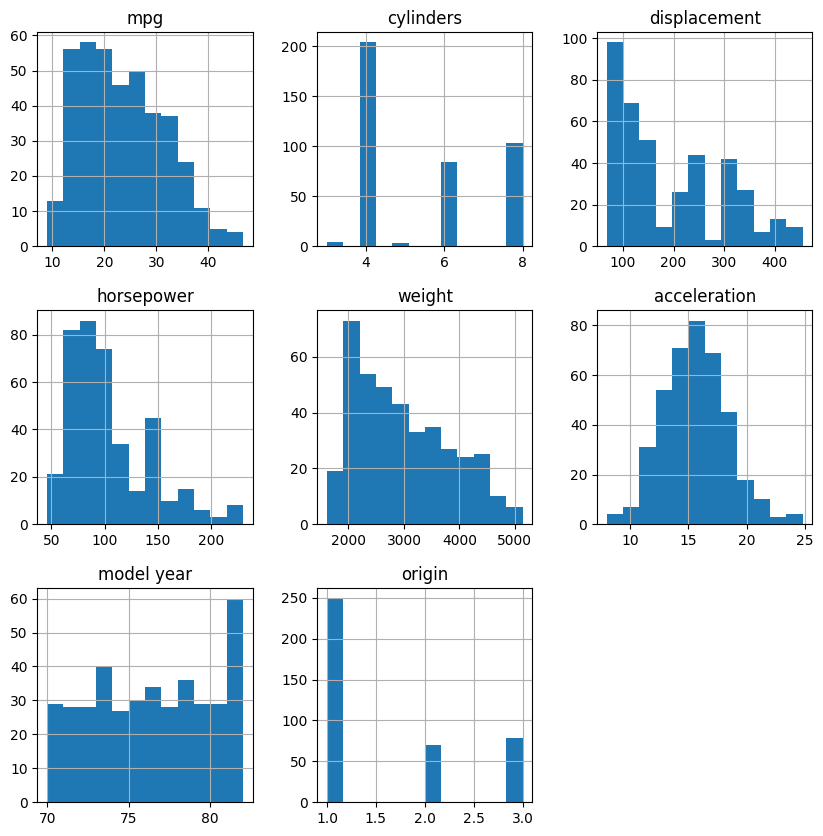

In [ ]:
auto_mpg_df.hist(bins=12,figsize=(10,10))
plt.show()

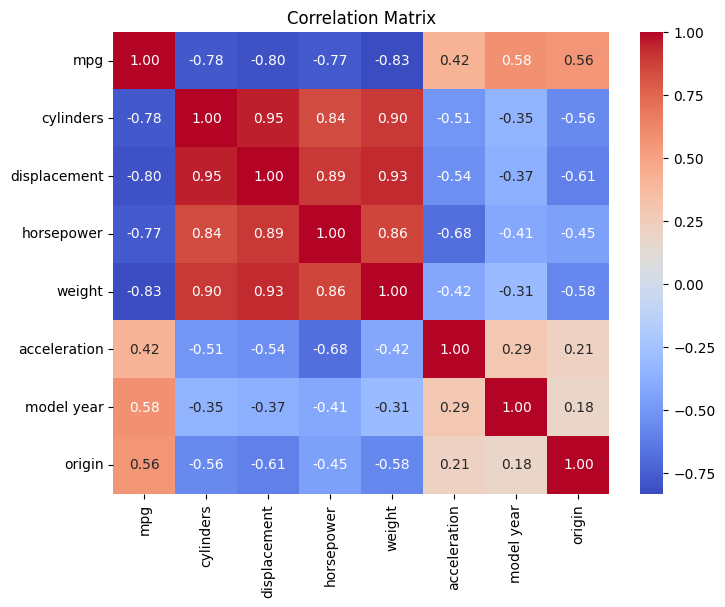

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(auto_mpg_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

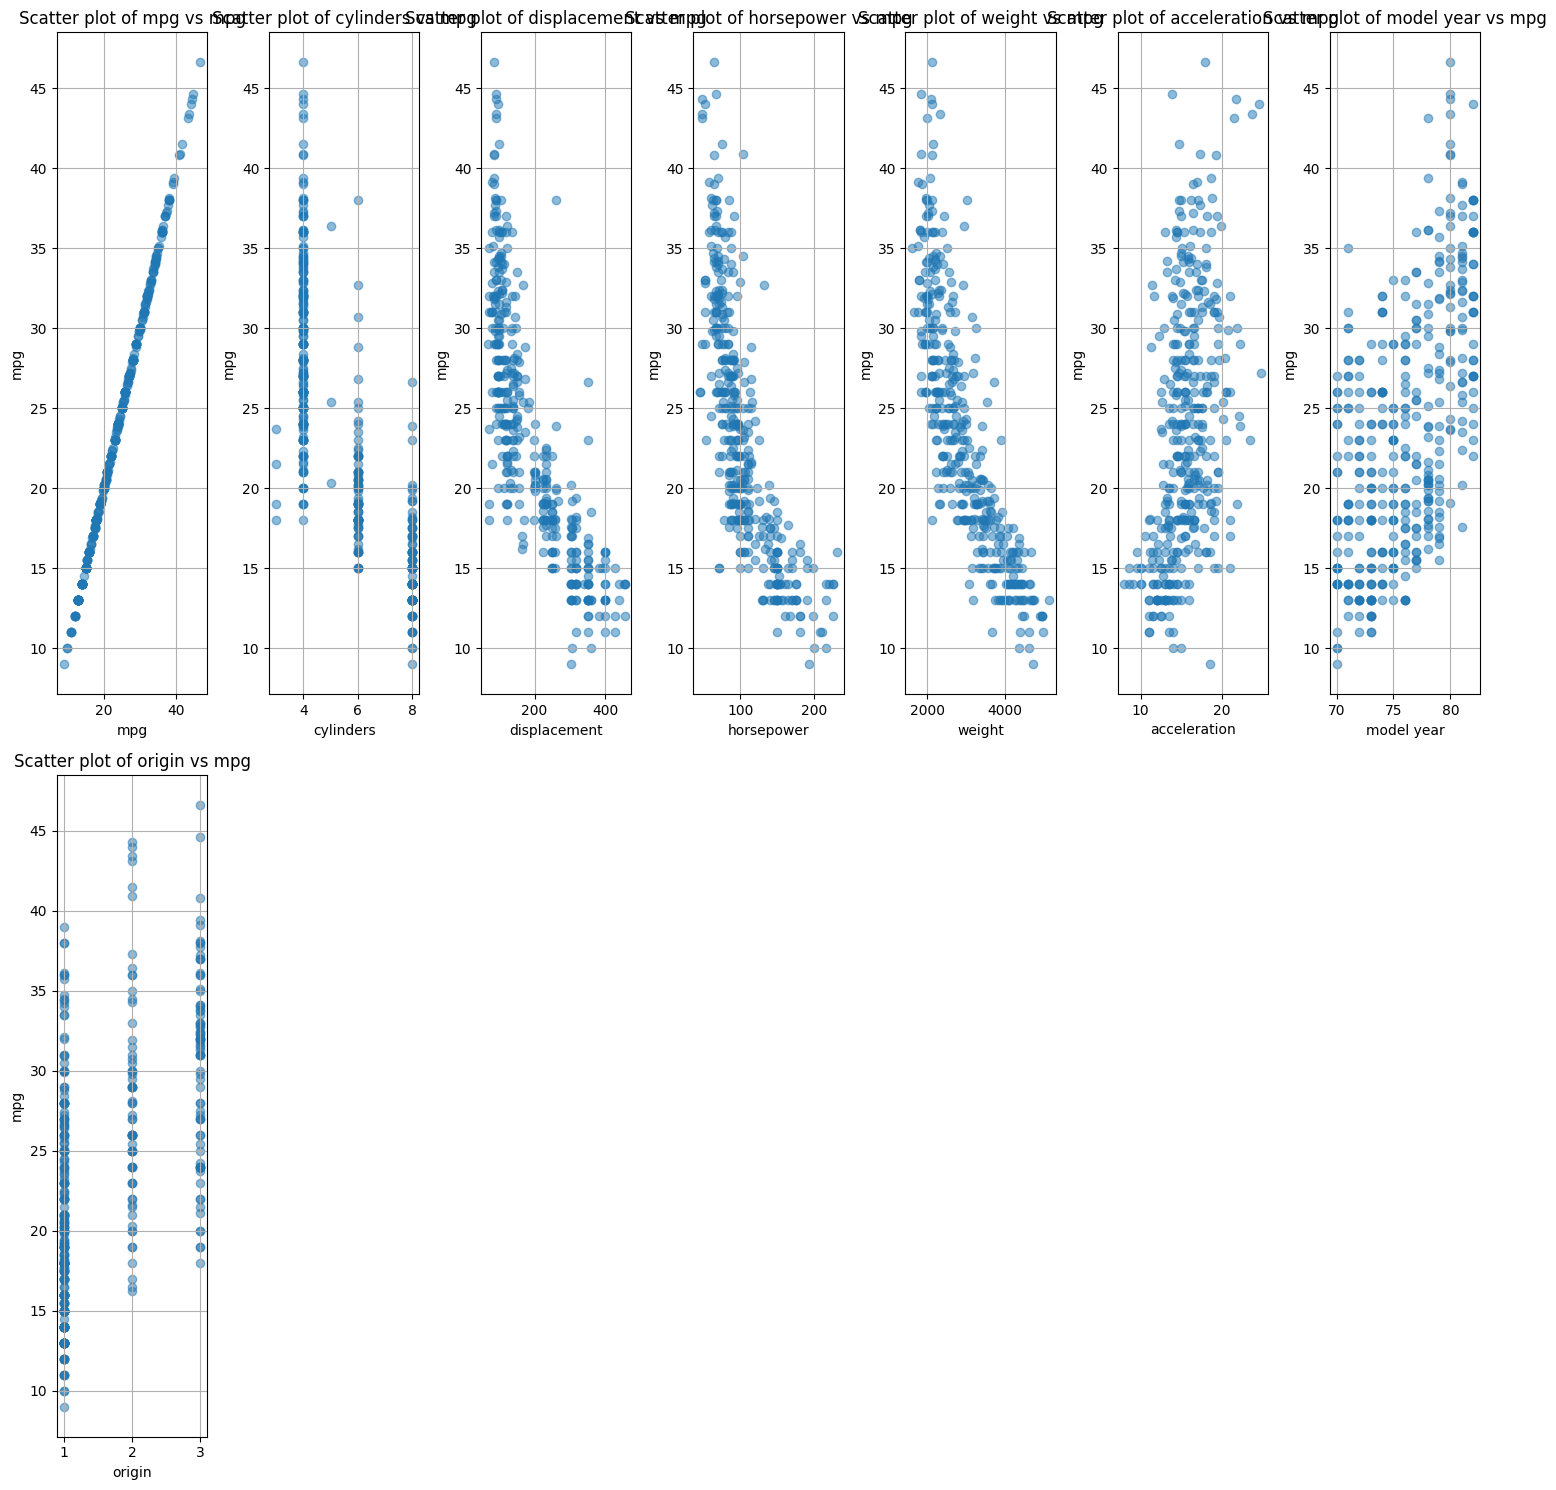

In [ ]:
fig, axs = plt.subplots(2, 7, figsize=(15,15))
axs = axs.flatten()
# Plot scatter plots for each feature column against the target column
for i, column in enumerate(auto_mpg_df.columns):
    axs[i].scatter(auto_mpg_df[column], auto_mpg_df['mpg'], alpha=0.5)
    axs[i].set_title(f'Scatter plot of {column} vs mpg')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('mpg')
    axs[i].grid(True)

# Hide empty subplots
for i in range(len(auto_mpg_df.columns), 2 * 7):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

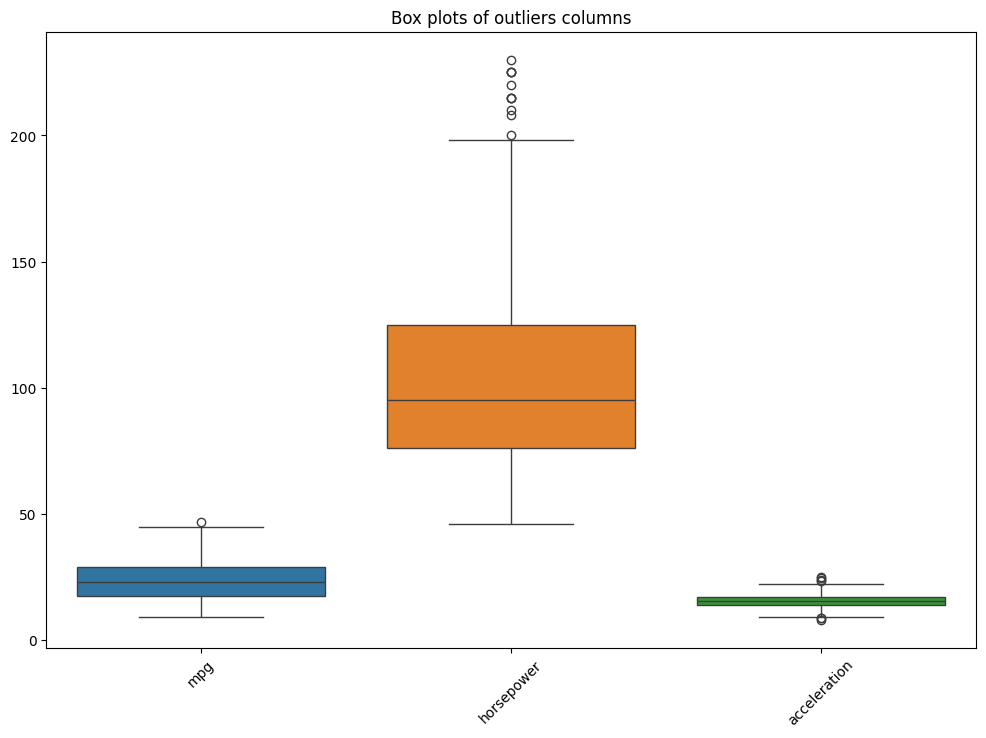

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=auto_mpg_df[['mpg','horsepower','acceleration']])
plt.title('Box plots of outliers columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [ ]:
def remove_outliers_iqr(df, multiplier=1.5):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    return df[(df >= lower_bound) & (df <= upper_bound)]

In [ ]:
auto_mpg_dff=remove_outliers_iqr(auto_mpg_df, multiplier=1.5)
auto_mpg_dff.isna().sum()

mpg              1
cylinders        0
displacement     0
horsepower      11
weight           0
acceleration     7
model year       0
origin           0
dtype: int64

In [ ]:
auto_mpg_dff=auto_mpg_dff.fillna(auto_mpg_dff.mean(numeric_only=True))
auto_mpg_dff.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.456423,5.454774,193.425879,101.260982,2970.424623,15.535806,76.010050,1.572864
std,7.729413,1.701004,104.269838,33.101274,846.841774,2.542178,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,9.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,14.000000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,115.000000,3608.000000,17.000000,79.000000,2.000000
max,44.600000,8.000000,455.000000,198.000000,5140.000000,22.200000,82.000000,3.000000


In [ ]:
auto_mpg_dff.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


#Preprocessing data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(auto_mpg_dff)
auto_mpg_df_scaled = pd.DataFrame(scaled_data, columns=auto_mpg_dff.columns)

In [ ]:
X=auto_mpg_df_scaled.drop(columns='mpg')#features
Y=auto_mpg_df_scaled.mpg#target
X.shape,Y.shape

((398, 7), (398,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y.to_numpy().reshape(-1,1), test_size=0.2, random_state=42)

In [ ]:
Y_train[:5]

array([[-0.96589594],
       [ 0.45903061],
       [ 1.75441838],
       [ 1.63783348],
       [-0.0591245 ]])

#Modeling

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=[7, 7]))

model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(20, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7, 50)             400       
                                                                 
 dense_9 (Dense)             (None, 7, 20)             1020      
                                                                 
 dense_10 (Dense)            (None, 7, 10)             210       
                                                                 
 dense_11 (Dense)            (None, 7, 1)              11        
                                                                 
Total params: 1641 (6.41 KB)
Trainable params: 1641 (6.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="MeanSquaredError",
              optimizer="Adam",
              metrics=["mae",'mse'])

#Train

In [ ]:
history = model.fit(X_train, Y_train, batch_size= 50 ,epochs=500)

Epoch 1/500
7/7 [==============================] - 3s 5ms/step - loss: 1.1580 - mae: 0.8783 - mse: 1.1580
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.8700 - mae: 0.7676 - mse: 0.8700
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6893 - mae: 0.6861 - mse: 0.6893
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.5736 - mae: 0.6308 - mse: 0.5736
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 0.5179 - mae: 0.5969 - mse: 0.5179
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.4766 - mae: 0.5696 - mse: 0.4766
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 0.4393 - mae: 0.5435 - mse: 0.4393
Epoch 8/500
7/7 [==============================] - 0s 4ms/step - loss: 0.4060 - mae: 0.5201 - mse: 0.4060
Epoch 9/500
7/7 [==============================] - 0s 4ms/step - loss: 0.3715 - mae: 0.4972 - mse: 0.3715
Epoch 10/500
7/7 [============================

#Evaluation

In [ ]:
model.evaluate(X_test, Y_test)
Y_test.shape

3/3 [==============================] - 0s 15ms/step - loss: 0.1245 - mae: 0.2643 - mse: 0.1245


(80, 1)

#inferance

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
y_pred.shape
r2_sqr = r2_score(Y_test, y_pred)
print("R2 Score:", r2_sqr)

3/3 [==============================] - 0s 3ms/step
R2 Score: 0.8620072594130104


In [ ]:
X_new = X_test[:10]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 17ms/step


array([[ 0.913635  ],
       [ 0.7417697 ],
       [-0.52585745],
       [-1.1373672 ],
       [-1.280048  ],
       [ 0.5806035 ],
       [ 0.35001728],
       [-1.4895927 ],
       [-0.792526  ],
       [-0.6311927 ]], dtype=float32)

In [ ]:
y_new = Y_test[:10]
y_new

array([[ 1.23626327],
       [ 0.58856939],
       [-0.57727961],
       [-1.35451227],
       [-1.22497349],
       [ 0.45903061],
       [ 0.07041428],
       [-1.35451227],
       [-0.83635716],
       [-0.31820205]])

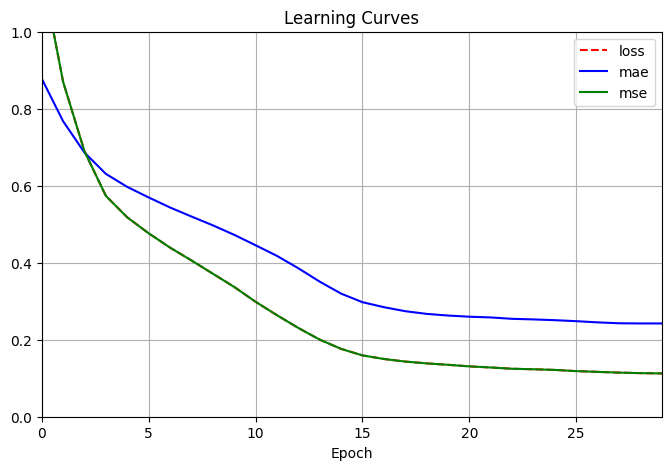

In [ ]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "b-",'g'])
plt.title("Learning Curves")
plt.show()
# It is clear that the loss equals the mse